In [18]:
import pandas as pd
#import umap
#import umap.plot
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_places = pd.read_csv('../crawling-and-preprocessing/content/data_prep_2805_3.csv', usecols=['place', 'singular_cleaned_nouns'])
df_places['singular_cleaned_nouns'] = df_places['singular_cleaned_nouns'].apply(literal_eval)
#df_places['nouns_string'] = df_places['singular_cleaned_nouns'].apply(literal_eval)
df_places

,place,singular_cleaned_nouns
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S..."
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is..."
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y..."
3,The Big Island,"[Island, Island, Room, Population, Town, Perso..."
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art..."
...,...,...
95,Picos de Europa,"[Europa, Mountain, Favourite, Walker, Trekker,..."
96,Santander,"[City, Population, Resort, Transport, Connecti..."
97,Malaga,"[Place, City, South, Population, Workforce, Cl..."
98,Ibiza,"[Catalan, Island, Exces, Score, Cove, Beach, P..."


In [19]:
for row in df_places.itertuples():
    print(type(row.singular_cleaned_nouns))
    print(row.singular_cleaned_nouns)
    break

<class 'list'>
['Swamp', 'Mile', 'Downtown', 'Island', 'City', 'Canal', 'Site', 'Day', 'Commercialism', 'Money', 'Point', 'Thing', 'Kalakaua', 'Avenue', 'Place', 'Beach', 'Strip', 'Sand', 'Place', 'Surf', 'Lesson', 'Outrigger', 'Canoe', 'Ride', 'Pedestrian', 'Walkway', 'Edge', 'Garden', 'Refuge', 'Frenzy', 'Centre', 'Spot']


In [20]:
df_places['nouns_string'] = [' '.join(map(str, l)) for l in df_places['singular_cleaned_nouns']]
df_places['nouns_string'] = df_places['nouns_string'].map(lambda x: x.lower())
df_places

,place,singular_cleaned_nouns,nouns_string
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S...",swamp mile downtown island city canal site day...
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y...",park yellowstone national park visitor year pe...
3,The Big Island,"[Island, Island, Room, Population, Town, Perso...",island island room population town person capt...
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...
...,...,...,...
95,Picos de Europa,"[Europa, Mountain, Favourite, Walker, Trekker,...",europa mountain favourite walker trekker climb...
96,Santander,"[City, Population, Resort, Transport, Connecti...",city population resort transport connection se...
97,Malaga,"[Place, City, South, Population, Workforce, Cl...",place city south population workforce cluster ...
98,Ibiza,"[Catalan, Island, Exces, Score, Cove, Beach, P...",catalan island exces score cove beach pine for...


In [21]:
print(df_places['nouns_string'][1].lower())

folklore film hearsay key mile chain island mile image intrigue day cocaine cowboy beach view sunset west usathe lover paradise fishing snorkelling diving area reef band coral mile coast key stop west self conch republic style street plenty bar hour sunset cuisine part shack food atmosphere conch mollusc speciality chowder fritter lime concoction lime milk resemblance imposter py rest mainland west culture rest attitude lifestyle islander expanse tourist year place spirit attitude influx population bahamian village thoma petronium street cuban african bahamian corner town patchwork storey cigar maker cottage grocery church foliage


In [22]:
tfid_vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
tfid_word_doc_matrix = tfid_vectorizer.fit_transform(df_places['nouns_string'])
tfid_vectorizer.get_feature_names_out()

array(['acces', 'accident', 'accommodation', ..., 'youth', 'zona', 'zone'],
      dtype=object)

In [23]:
tfid_word_doc_matrix.shape

(100, 1340)

In [24]:
from sklearn.cluster import KMeans
true_k = 48
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tfid_word_doc_matrix)
labels=model.labels_
df_places['cluster'] = labels
df_places

,place,singular_cleaned_nouns,nouns_string,cluster
0,Waikiki,"[Swamp, Mile, Downtown, Island, City, Canal, S...",swamp mile downtown island city canal site day...,25
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...,43
2,Yellowstone National Park,"[Park, Yellowstone, National, Park, Visitor, Y...",park yellowstone national park visitor year pe...,3
3,The Big Island,"[Island, Island, Room, Population, Town, Perso...",island island room population town person capt...,41
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...,45
...,...,...,...,...
95,Picos de Europa,"[Europa, Mountain, Favourite, Walker, Trekker,...",europa mountain favourite walker trekker climb...,27
96,Santander,"[City, Population, Resort, Transport, Connecti...",city population resort transport connection se...,31
97,Malaga,"[Place, City, South, Population, Workforce, Cl...",place city south population workforce cluster ...,5
98,Ibiza,"[Catalan, Island, Exces, Score, Cove, Beach, P...",catalan island exces score cove beach pine for...,6


In [28]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tfid_word_doc_matrix.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
df_places['x0'] = x0
df_places['x1'] = x1



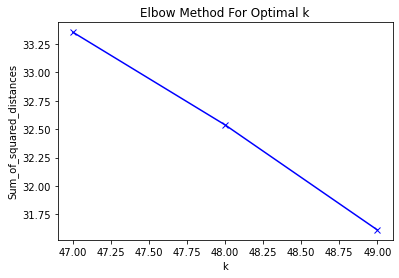

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(47,50)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfid_word_doc_matrix)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [30]:
df_places.sort_values(by=['cluster'])


,place,singular_cleaned_nouns,nouns_string,cluster,x0,x1
33,Huacachina,"[Myth, Lagoon, Princes, Clothe, Mirror, Hunter...",myth lagoon princes clothe mirror hunter mirro...,0,0.168594,-0.023493
40,Rio de Janeiro,"[Citizen, City, Janeiro, Cidade, Marvilhosa, A...",citizen city janeiro cidade marvilhosa argumen...,1,-0.181386,0.173579
69,Champagne,"[Stuff, Reason, Person, Vineyard, Cellar, Regi...",stuff reason person vineyard cellar region cap...,2,-0.092640,-0.109978
21,Niagara Falls,"[Thousand, Charle, Tightrope, Time, Midway, Om...",thousand charle tightrope time midway omelette...,2,0.201784,-0.075611
76,Stuttgart,"[World, Town, Baden, Capital, Population, Sett...",world town baden capital population setting pa...,2,-0.074221,-0.071497
...,...,...,...,...,...,...
1,The Florida Keys,"[Folklore, Film, Hearsay, Key, Mile, Chain, Is...",folklore film hearsay key mile chain island mi...,43,0.038842,0.133282
70,Freiburg,"[Climate, Hill, Picture, Postcard, Breisgau, P...",climate hill picture postcard breisgau place s...,44,0.027385,0.047294
4,The Great Plains,"[Hill, Grassland, Great, Home, Adventurer, Art...",hill grassland great home adventurer artist ou...,45,0.053507,-0.026592
66,Marseille,"[Year, Renaissance, Port, Reputation, Sleaze, ...",year renaissance port reputation sleaze danger...,46,-0.157145,-0.001136


In [34]:
import numpy as np
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(tfid_word_doc_matrix.todense()).groupby(labels).mean() # groups the TF-IDF vector by cluster
    terms = tfid_vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)




Cluster 0
problem,water,myth,hunter,neck,sand,power,lake,dune,lagoon

Cluster 1
mountain,parade,street,music,avenida,procession,city,ball,beach,school

Cluster 2
lake,bottle,river,tower,motor,year,town,grape,vineyard,wine

Cluster 3
grand,meadow,bear,mind,eagle,offer,bison,diversity,park,volcano

Cluster 4
shore,boat,town,trip,fishing,island,trail,watching,beach,whale

Cluster 5
work,grande,district,area,centre,bar,restaurant,century,canal,city

Cluster 6
village,cove,bar,tower,century,water,town,port,island,beach

Cluster 7
railway,pas,valley,ascent,national,hike,trail,backcountry,lake,park

Cluster 8
person,state,temple,building,plaza,village,ruin,pyramid,site,city

Cluster 9
market,valley,fiestum,alternative,virgen,route,cathedral,citadel,plaza,inca

Cluster 10
pinnacle,movie,backcountry,rock,detmy,spot,tour,valley,mile,monument

Cluster 11
ship,flight,lakeside,council,count,day,time,passenger,town,lake

Cluster 12
centre,street,park,island,tower,work,collection,century,building,ci